オートエンコーダ (AutoEncoder)

オートエンコーダ（以下AE）は、RBM（Restricted Boltzmann Machine）と共に、ディープラーニング理論の構築における基盤となった重要な概念の1つです。AEとRBMは非常に類似した目標を持ち、どちらも入力層（または可視層）のデータに関する隠れた要因（latent factors）を隠れ層から取得することを目指しています。

AEはデータを圧縮し、再び元に戻す（解凍する）プロセスを行うニューラルネットワークです。AEの目的は、非線形的な次元削減を行い、高次元のデータを低次元の空間で表現することです。これにより、データの一部の損失が発生する可能性がありますが、この損失を最小化するプロセスを通じて、より良いAEとして訓練されることができます。

もう1つの理由は、これまでに見たことのないデータを生成する際にAEが力を発揮することです。AEは低次元の空間で表現されるデータを再び高次元に解凍する方法を学習しているため、低次元空間で任意の点を選んで解凍すれば、新しいデータを生成することができます。

### AEの構造と役割

![オートエンコーダの構造と役割](insert appropriate image link here)

#### 圧縮の観点：エンコーダの役割
データの圧縮は「次元削減」に似ていますが、AEは非線形な次元削減を行うため、圧縮という言葉を使います。AEはデータを圧縮し、その結果として表現ベクトル（representation vector）を生成します。このベクトルは、低次元の潜在空間（latent space）にデータを投影して表現するものです。

例えば、MNISTデータセットを用いて784次元のデータ（28×28）を2次元に圧縮し、その表現ベクトルを可視化すると、異なる数字がそれぞれの位置に分布する様子が確認できます。

#### 解凍の観点：デコーダの役割
デコーダは、潜在空間内の任意の表現ベクトルを受け取り、それが持つ元の意味を解釈して、元のサイズのデータに復元します。例えば、2次元の潜在空間から任意のベクトルをサンプリングし、そのベクトルを解凍すると、さまざまな数字や新しい形のデータが生成されることがあります。

### AEの入出力結果
AEの本来の役割は、入力データを出力として再現することです。AEが訓練されたモデルが入力を再構成する際の精度は、データの復元能力を測る指標となります。

### AEとディープラーニングの関係
ディープラーニングの核は、単に「層が深い」というだけでなく、深くなることでどのような効果が得られるかにあります。AEは、データセットの抽象的な特性を学習し、低次元の潜在空間に象徴的な特徴を構成するため、データの抽象化を行っています。この特性を利用して、深いニューラルネットワークをトレーニングする基盤としてAEが活用されることがあります。

AEを利用してより深い層を積み重ねたものは「スタックドオートエンコーダ（Stacked AutoEncoder）」と呼ばれ、得られた抽象的な特徴を微調整することで、深層ニューラルネットワークを効果的に学習させることが可能となります。

---

AEは、データの圧縮と解凍を通じて、新しいデータの生成やデータの抽象化を行う強力なツールであり、ディープラーニングの発展において重要な役割を果たしています。

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38333113.20it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3672670.58it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11808693.76it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6884903.78it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Epoch [1/10], Loss: 0.0395
Epoch [2/10], Loss: 0.0369
Epoch [3/10], Loss: 0.0390
Epoch [4/10], Loss: 0.0324
Epoch [5/10], Loss: 0.0261
Epoch [6/10], Loss: 0.0317
Epoch [7/10], Loss: 0.0281
Epoch [8/10], Loss: 0.0332
Epoch [9/10], Loss: 0.0383
Epoch [10/10], Loss: 0.0332


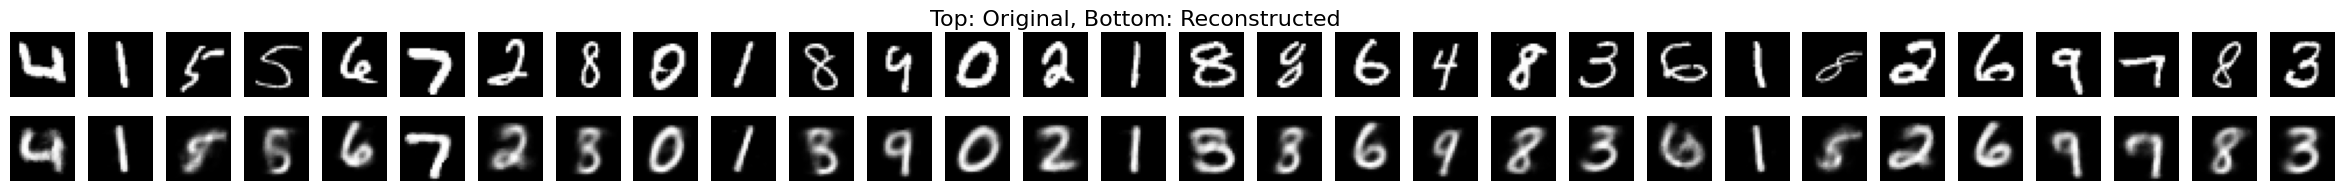

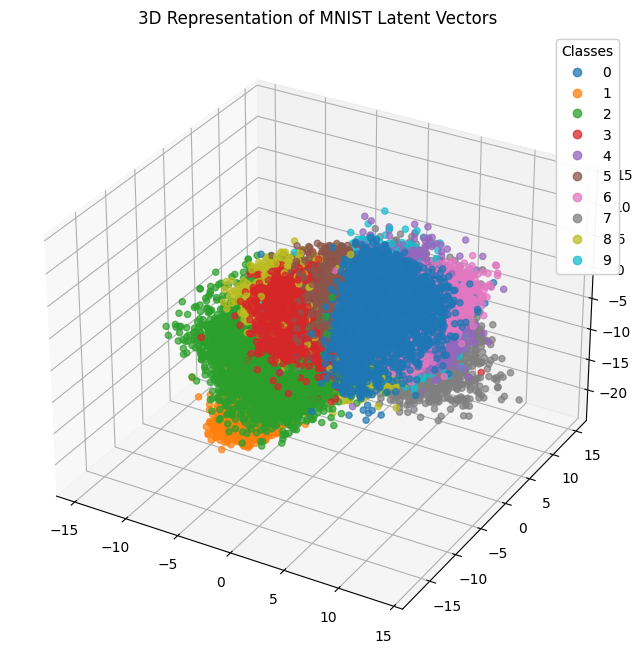

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Autoencoderの定義
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # エンコーダ部分
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 3)  # 3次元の潜在空間
        )
        # デコーダ部分
        self.decoder = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # 画像のピクセル値は0〜1にスケールされているのでSigmoidを使う
        )

    def forward(self, x):
        z = self.encoder(x)  # エンコーダで潜在空間へ圧縮
        x_reconstructed = self.decoder(z)  # デコーダで再構築
        return z, x_reconstructed

# データセットの準備
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST('./MNIST_data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# モデル、損失関数、最適化手法の定義
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# モデルの学習
epochs = 10
for epoch in range(epochs):
    for data, _ in train_loader:
        optimizer.zero_grad()
        z, output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 学習後の30サンプルの再構築結果を表示
test_samples = next(iter(train_loader))[0][:30]
with torch.no_grad():
    _, reconstructed = model(test_samples)

fig, axs = plt.subplots(2, 30, figsize=(30, 2))
for i in range(30):
    # オリジナルの画像
    axs[0, i].imshow(test_samples[i].view(28, 28).numpy(), cmap='gray')
    axs[0, i].axis('off')
    # 再構築された画像
    axs[1, i].imshow(reconstructed[i].view(28, 28).numpy(), cmap='gray')
    axs[1, i].axis('off')
plt.suptitle('Top: Original, Bottom: Reconstructed', fontsize=16)
plt.show()

# 全データの表現ベクトルを3次元空間上にプロット
all_data = train_dataset.data.view(-1, 28 * 28).float() / 255.0  # 正規化
all_labels = train_dataset.targets
with torch.no_grad():
    latent_vectors, _ = model(all_data)  # 全データをエンコーダに通して潜在ベクトルを取得

latent_vectors = latent_vectors.numpy()

# t-SNEで3次元にプロット
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], c=all_labels, cmap='tab10', alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.title('3D Representation of MNIST Latent Vectors')
plt.show()
